In [1]:
import numpy as np
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data               # features: sepal length, sepal width, petal length, petal width
y = iris.target             # labels: 0=setosa, 1=versicolor, 2=virginica
target_names = iris.target_names

print(X.shape)  # (150, 4)

(150, 4)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. Train–test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# 2. Build KNN classifier
# -----------------------------
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)   # "training" = storing labeled points

# -----------------------------
# 3. Evaluate
# -----------------------------
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"KNN accuracy with k={k}: {acc:.3f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=target_names))

# -----------------------------
# 4. Predict one new example
# -----------------------------
new_flower = np.array([[5.0, 3.5, 1.4, 0.2]])
pred_label = knn.predict(new_flower)[0]
print("New flower predicted as:", target_names[pred_label])


KNN accuracy with k=5: 0.978

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

New flower predicted as: setosa


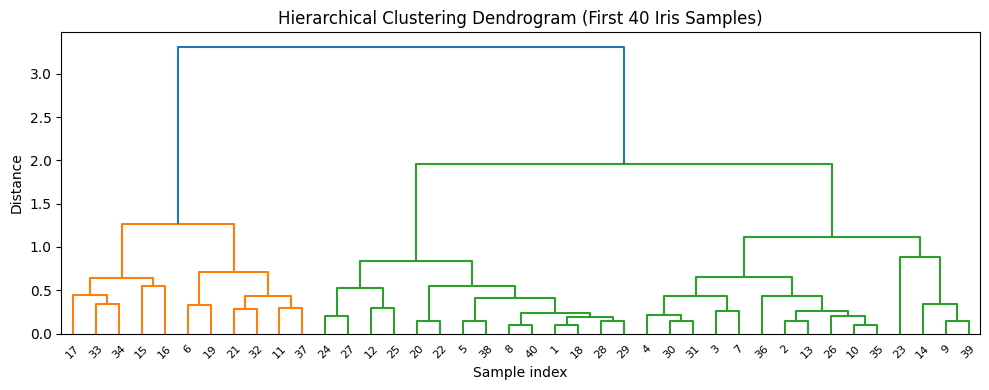

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# To keep the dendrogram readable, use only first 40 samples
X_small = X[:40]

linked = linkage(X_small, method='ward')  # Ward's = popular, uses Euclidean distance

plt.figure(figsize=(10, 4))
dendrogram(linked, labels=list(range(1, 41)))
plt.title("Hierarchical Clustering Dendrogram (First 40 Iris Samples)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.cluster import AgglomerativeClustering

# -----------------------------
# 3 clusters from hierarchical
# -----------------------------
hc = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"   # Ward implies Euclidean distance
)
cluster_labels = hc.fit_predict(X)

print("Cluster labels (first 30 samples):")
print(cluster_labels[:30])


Cluster labels (first 30 samples):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
import pandas as pd

df_compare = pd.DataFrame({
    "true_label": y,
    "true_species": [target_names[i] for i in y],
    "cluster": cluster_labels
})

print(df_compare.head(15))
print("\nCluster counts by true species:\n")
print(pd.crosstab(df_compare["cluster"], df_compare["true_species"]))


    true_label true_species  cluster
0            0       setosa        1
1            0       setosa        1
2            0       setosa        1
3            0       setosa        1
4            0       setosa        1
5            0       setosa        1
6            0       setosa        1
7            0       setosa        1
8            0       setosa        1
9            0       setosa        1
10           0       setosa        1
11           0       setosa        1
12           0       setosa        1
13           0       setosa        1
14           0       setosa        1

Cluster counts by true species:

true_species  setosa  versicolor  virginica
cluster                                    
0                  0          49         15
1                 50           0          0
2                  0           1         35
